# Assignment 1

Preparing data

In [162]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import pandas as pd
import numpy as np


data1 = pd.read_csv("ds-boot-1.csv", delimiter="\t")
data2 = pd.read_csv("ds-boot-2.csv", delimiter="\t")

y = []
ys = 5
xs = 26
y.append([])
for i in range(1, 5):
    name = 'y' + str(i)
    y.append(data2[name])
    
x = data2.loc[:,'p1':'p26']   
    

Finding mean and median

In [151]:

#returns bootstrap sample from the given sample the same size
def gen_boot_sample(sample):
    n = len(sample)
    res = []
    for i in range(n):
        ind = int (np.random.rand() * n)
        res.append(sample[ind])        
    return res
   

#generates size bootstrap samples
def gen_boot_samples(sample, size):
    samples = []
    for i in range(size):
        samples.append(gen_boot_sample(sample))
    return samples



#returns Q*_b and SE
def boot_estimation(sample, size, func):
    boot_samples = gen_boot_samples(sample, size)
    res = list(map(func, boot_samples))
    q_star = np.mean(res)    
    dif = (res - q_star) *(res - q_star)
    se = np.sum(dif) / (size - 1)
    se = np.sqrt(se)    
    return q_star, se 
    
bootstrap_size = 100    
    
for i in range(1, ys):  
    print("y" + str(i) + ":")
    print("Mean, square error:")
    print(boot_estimation(y[i], bootstrap_size , np.mean))

    print("Median, median:")
    print(boot_estimation(y[1], bootstrap_size , np.median))
    print("- - - - - - - - - - - - - - - - - -")

y1:
Mean, square error:
(4.0009999999999994, 0.44553296310387758)
Median, median:
(4.0650000000000004, 0.55004591176601347)
- - - - - - - - - - - - - - - - - -
y2:
Mean, square error:
(5.4611874999999994, 0.42545772940903176)
Median, median:
(3.9900000000000002, 0.5880974288828219)
- - - - - - - - - - - - - - - - - -
y3:
Mean, square error:
(7.2934274999999991, 0.46515233913718856)
Median, median:
(3.9500000000000002, 0.58603271532768841)
- - - - - - - - - - - - - - - - - -
y4:
Mean, square error:
(1.5251724999999998, 0.11376711046246976)
Median, median:
(4.0025000000000004, 0.53476960960168196)
- - - - - - - - - - - - - - - - - -


In [159]:
#Experiments with number of bootstrap samples
errors = []
sizes = []
for b_size in range(3, 1000):
    res = boot_estimation(y[i], b_size , np.mean)
    errors.append(res[1])
    sizes.append(b_size)

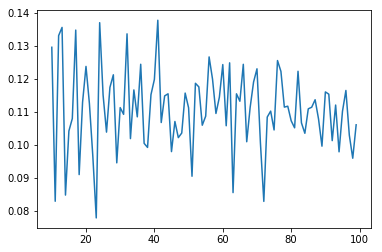

In [157]:
plt.plot(sizes, errors)
plt.show()

Linear model: confidence intervals

In [150]:


def find_linear_coef_all(data):
    data = np.transpose(data)
    n = len(data[0])
    num = len(data)
    
    
    x = data[:][0:(num - 1)]
    x = np.transpose(x)
    y = data[:][(num - 2):(num - 1)]
    y = np.transpose(y)
    
    #for i in range(n - 1):        
    #   x[i].append(1)
    #   print(x[i])
    
    xt = np.transpose(x)
    
    
    theta = np.dot(xt, x)
    theta = np.linalg.inv(theta)
    theta = np.dot(theta, xt)
    theta = np.dot(theta, y)
    return theta


def find_linear_coef(x, y):    
    num = x.shape[0]
    appendix = np.transpose(np.ones(num))
    x['free'] = appendix    
    xt = np.transpose(x)
    theta = np.linalg.inv(np.dot(xt, x))
    theta = np.dot(theta, xt)
    theta = np.dot(theta, y)
    return theta



def gen_boot_sample_ND(y_num):
    n = len(data2)
    
    y_name = 'y' + str(y_num)        
    res = []
    for i in range(n):
        ind = int (np.random.rand() * n)
        r = []
        for i in range(1, 26):
            x_name = 'p' + str(i)
            r.append(data2[x_name][ind])
        res.append(r)
    return res
   

#generates size bootstrap samples
def gen_boot_samples_ND(y_num, size):
    samples = []
    for i in range(size):
        samples.append(gen_boot_sample_ND(y_num))
    return samples

def boot_estimation_ND(y_num, size, func):
    boot_samples = gen_boot_samples_ND(y_num, size)
    res = list(map(func, boot_samples))
    q_star = np.mean(res)    
    dif = (res - q_star) *(res - q_star)
    se = np.sum(dif) / (size - 1)
    se = np.sqrt(se)  
    e = (res - q_star)
    return q_star, se

def confidence_interval_ND(y_num, size, func):
    boot_samples = gen_boot_samples_ND(y_num, size)
    res = list(map(func, boot_samples))
    q_star = np.mean(res)    
    dif = (res - q_star) *(res - q_star)
    er = np.sum(dif) / (size - 1)
    er = np.sqrt(se) 
    e = (res - np.percentile(er, 2.5, axis = 0), res + np.percentile(er, 97.5, axis = 0))
    return e 
    
bootstrap_size_ND = 5  

 
print('Linear model coefficients for first y, last coefficient is free:')
print(find_linear_coef(x, y[1]))

#print(gen_boot_samples_ND(1, bootstrap_size_ND))
for 
print(boot_estimation_ND(1, bootstrap_size_ND, find_linear_coef_all))





Linear model coefficients for first y, last coefficient is free:
[  4.25044974e-01  -9.50331049e-02  -4.85459207e-01   9.76937043e-01
  -3.45391352e-01   7.93654457e-01  -1.03891777e+00  -2.39555290e-01
  -3.51465253e-01  -2.05030008e-02   7.58507828e-01  -1.65532451e-01
   2.12583748e-01   3.12275421e-02  -5.88750176e-01   2.24325296e-01
   4.80507090e-01  -9.97469001e-02  -4.14684603e-01  -1.97776807e-01
   5.31977768e-01   3.64852098e-04   4.74761601e-01  -4.87963791e-01
   4.05700585e-01  -2.13727017e-02  -8.66731161e-02]
(0.023350129743587543, 4.3653527461747572)


# Assignment 2

(array([  8.52256485e+03,   1.86485536e-03]), 106308245.87646618)


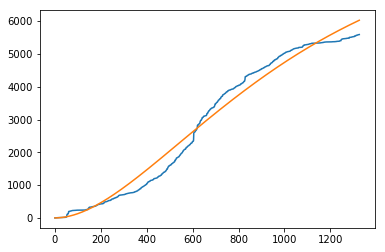

/home/ekaterina/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: overflow encountered in square


('a = ', 2798.5118445672801)
('b = ', 264.69946052801259)
Confidence interval for a: (2450.55680295, 3240.61406892)
Confidence interval for b: (212.698607473, 758.007577927)


In [179]:
def goel_oku(a, b, t):
    return (a * (1 - (1 + b * t)* np.exp(-1 * b * t)))

a_start = 5900
b_start = 0.0035
def stat_func(args):
    t = np.arange(len(data1['cummBugs']))
    return ((data1['cummBugs'] - goel_oku(args[0], args[1], t)) ** 2).sum() 

def parameter_func(args, y):
    t = np.arange(len(y))
    return ((y - goel_oku(args[0], args[1], t)) ** 2).sum()

def conf_int_assig2(data, b_size):
    samples = np.random.choice(data, size=(b_size, len(data)))
    parameters = []
    for sample in samples:
        y = np.cumsum(sample)
        parameters.append(minimize(parameter_func, [a], y, method='Nelder-Mead').x)       

    parameters = np.array(parameters)
    res = parameters.mean(axis=0)
    conf_int = np.percentile(parameters, [2.5, 97.5], axis=0)
    return res, conf_int
    
    

optima = minimize(stat_func, [a_start, b_start], method='Nelder-Mead')
print(optima.x, optima.fun)

x = np.arange(len(data1['cummBugs']))
y = goel_oku(optima.x[0], optima.x[1], x)


plt.plot(data1['cummBugs'])
plt.plot(y)
plt.show()

   
bootstrap_size = 1000
data = data1['bugsPerDay']
res, conf_int = conf_int_assig2(data, bootstrap_size)
print("a = ", res[0])
print("b = ", res[1])
print("Confidence interval for a: (" + str(conf_int[0][0]) + ", " + str(conf_int[1][0]) + ")")
print("Confidence interval for b: (" + str(conf_int[0][1]) + ", " + str(conf_int[1][1]) + ")")